<a href="https://colab.research.google.com/github/IsmaelMax/Atividade2/blob/main/C%C3%B3pia_de_An%C3%A1lise_1_Trade_Quantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
## Run This Cell for Colab
!pip install yfinance
!pip install vectorbt
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 563 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 5.0 MB/s 
     |████████████████████████████████| 292 kB 49.0 MB/s 
     |████████████████████████████████| 1.6 MB 31.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 248 kB/s 


In [ ]:
import vectorbt as vbt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Definindo parâmetros

In [ ]:
# Análise de um Ativo Americano
codigo = 'BRCR11.SA'
ativos_comparacao = [codigo, '^BVSP', 'MXRF11.SA']

data_inicial = '2018-01-01'  
data_final = '2019-01-01'

# Os preços de fechamentos dos ativos
vbt.YFData.download(ativos_comparacao, start=data_inicial, end=data_final).get('Close')

symbol,BRCR11.SA,^BVSP,MXRF11.SA
Date,,,
2018-01-02 02:00:00+00:00,96.825401,77891.0,8.802862
2018-01-03 02:00:00+00:00,97.097893,77995.0,8.849241
2018-01-04 02:00:00+00:00,97.415794,78647.0,8.821415
2018-01-05 02:00:00+00:00,96.734573,79071.0,8.904897
2018-01-08 02:00:00+00:00,96.280418,79379.0,8.979106
...,...,...,...
2018-12-20 02:00:00+00:00,92.447380,85269.0,9.331592
2018-12-21 02:00:00+00:00,92.647186,85697.0,9.340866
2018-12-26 02:00:00+00:00,92.946930,85136.0,9.322314


## Baixando os dados

In [ ]:
precos = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get()
fechamento = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get('Close')

# Analisando a Série

In [ ]:
fechamento.vbt.plot().show()

De acordo com o gráfico, no periodo de Janeiro a março houve uma volatilidade mantendo o volume negociado com pouca variação, e com um queda acentuada apartir do dia 30 de abril até o dia 19 de junho, apos esse periodo houve uma valorização gradual e com muita volatilidade.

In [ ]:
precos.vbt.ohlcv.plot().show()

De acordo com o gráfico, no periodo de Janeiro a março houve pouca volatilidade no volume negociado, contudo, apontando para a venda de um grande volume do ativo negociado ocasionando uma queda acentuada apartir do dia 30 de abril até o dia 19 de junho, o que demonstra a venda de apos esse periodo houve uma valorização gradual apesar da volatilidade  apresentada entre compra e venda.

## Gráfico comparativo

Com investimento inicial de \$1 (ou R\$ 1)

In [ ]:
vbt.YFData.download(ativos_comparacao,
                    start=data_inicial,
                    end=data_final).plot(column='Close', base=1).show()

Analisando os ativos representados no grafico, o BRCR11 é o que demontra ter menos valorização ao final do período, enquanto que BVSP, apesar de se manter menos valorizado em relação ao MXRF11 durante um tempo, foi o que atingiu uma maior valorização ao final do período.

## Gráfico Quant Stat

Retorno Cumulativo, Drawdown e Retorno Diário

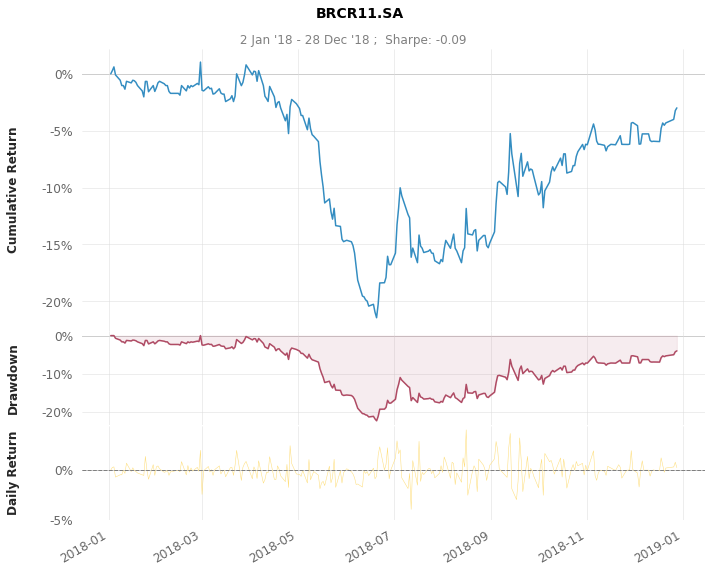

In [ ]:
warnings.filterwarnings('ignore')

retornos = fechamento.vbt.to_returns()
retornos.vbt.returns.qs.plot_snapshot(title=codigo)

O retorno acumulado demonstrado no gráfico apresenta estar entre 0% e -5%. O Indicador Drawdown representa um risco do ativo ao final do período. O retorno diario em contrapartida apresenta variações acima de 0%.

# Analisando Estratégias de Trade

## Simple Moving Averages

In [ ]:
n_periodos_curta = 20
n_periodos_longa = 50

media_curta = vbt.MA.run(fechamento, n_periodos_curta, short_name='media_curta')
media_longa = vbt.MA.run(fechamento, n_periodos_longa, short_name='media_longa')

fig = fechamento.vbt.plot(trace_kwargs=dict(name='Preço de Fechamento'))
media_curta.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Curta'), fig=fig)
media_longa.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Longa'), fig=fig)

fig.show()

A Média Móvel é um indicador de análise técnica de ativos, que possibilita identificar o equilíbrio dos preços no mercado em um determinado período de tempo, observando tendências de alta, neutra ou baixa. A Média Móvel Longa represenda um calculo do préço médio de um ativo ao longo de um determinado número de períodos, com essa análise é possivel avaliar se o ativo terá um retorno esperado ao final do período. Sendo assim, de acordo com o perfil de investidor de longo prazo, esse indicador se torna o principal a ser utilizado.

Pesquise sobre média móveis e escreva aqui a interpretação do gráfico acima. Comente também como as médias móveis escolhida por você pode servir como sinal de compra/venda em determinadas datas.

## Relative Strength Index

In [ ]:
rsi = vbt.RSI.run(fechamento)
rsi.plot().show()

O indicador RSI é utilizado para rastrear a tendência de preço de um determinado ativo. Logo, de acordo com o gráfico, com o indicador acima de 70 pontos representa uma sobrecompra, o que ocorreu três vezes durante esse período. já o indicador apontando para menos de 30 pontos, indica uma sobrevenda, o que ocorreu por um perído consecutivo apartir de maio até junho.

Pesquise sobre o RSI e escreva aqui a interpretação do gráfico acima.

## Stochastics

The TA-Lib Stoch function returns two lines slowk and slowd which can then be used to generate the buy/sell indicators.
A crossover signal occurs when the two lines cross in the overbought region (commonly above 80) or oversold region (commonly below 20).
When a slowk line crosses below the slowd line in the overbought region it is considered a sell indicator.
Conversely, when an increasing slowk line crosses above the slowd line in the oversold region it is considered a buy indicator.

In [ ]:
vbt.STOCH.run(precos['High'], precos['Low'], precos['Close']).plot().show()

O Indicador Estocástico analisa as oscilações de compra e venda de ativos. Sendo assim, de acordo com o gráfico, os momento de venda são representados pelas variações de 80 ou mais. Já os monentos de compra são representados pelas ocilações medino entre 20 ou abaixo.

Pesquise sobre o indicador estocástico e escreva aqui a interpretação do gráfico acima.

## Bollinger Bands

In [ ]:
vbt.BBANDS.run(fechamento).plot().show()

**Pesquise sobre bandas de bolinger e escreva aqui a interpretação do gráfico acima.**

Bandas de bollinger, é um indicador de volatilidade que é utilizado para prever se um determinado ativo está sobre-comprado, estável ou sobre-vendido e indica a tendência de alta e baixa, e é derivado de duas médias moveis sendo uma superior e outra inferior. Sendo assim, de acordo com o gráfico, o ativo mostra tendências de alta, ultrapassando sete vezes a Upper Band ao longo do período analisado. enquanto que apresentou apenas duas vezes a tendência de baixa, ficando abaixo da Lower band. Apesar da grande volatilidade, o preço se manteve equlibrado durante a maior parte do período.